In [1]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting

import sys # For printing

In [2]:
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])


y = np.array([
    [1],
    [1],
    [0],
    [0]
])

In [3]:
X

array([[0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [4]:
y

array([[1],
       [1],
       [0],
       [0]])

In [117]:
num_i_units = 2
num_h_units = 111
num_o_units = 1

In [119]:
learning_rate = 0.3333333
reg_param = 0
max_iter = 5000
m = 4

In [120]:
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units))
W2 = np.random.normal(0, 1, (num_o_units, num_h_units))

B1 = np.random.random((num_h_units, 1))
B2 = np.random.random((num_o_units, 1))

In [121]:
W1

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435],
       [ 1.13376944, -1.09989127],
       [-0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521],
       [-1.10061918,  1.14472371],
       [ 0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786],
       [-0.12289023, -0.93576943],
       [-0.26788808,  0.53035547],
       [-0.69166075, -0.39675353],
       [-0.6871727 , -0.84520564],
       [-0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ],
       [ 1.65980218,  0.74204416],
       [-0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ],
       [ 0.05080775, -0.63699565],
       [ 0.19091548,  2.10025514],
       [ 0.12015895,  0.61720311],
       [ 0.30017032, -0.35224985],
       [-1.1425182 , -0.34934272],
       [-0.20889423,  0.58662319],
       [ 0.83898341,

In [122]:
W2

array([[ 1.55880554e+00,  1.09402696e-01, -1.21974440e+00,
         2.44936865e+00, -5.45774168e-01, -1.98837863e-01,
        -7.00398505e-01, -2.03394449e-01,  2.42669441e-01,
         2.01830179e-01,  6.61020288e-01,  1.79215821e+00,
        -1.20464572e-01, -1.23312074e+00, -1.18231813e+00,
        -6.65754518e-01, -1.67419581e+00,  8.25029824e-01,
        -4.98213564e-01, -3.10984978e-01, -1.89148284e-03,
        -1.39662042e+00, -8.61316361e-01,  6.74711526e-01,
         6.18539131e-01, -4.43171931e-01,  1.81053491e+00,
        -1.30572692e+00, -3.44987210e-01, -2.30839743e-01,
        -2.79308500e+00,  1.93752881e+00,  3.66332015e-01,
        -1.04458938e+00,  2.05117344e+00,  5.85662000e-01,
         4.29526140e-01, -6.06998398e-01,  1.06222724e-01,
        -1.52568032e+00,  7.95026094e-01, -3.74438319e-01,
         1.34048197e-01,  1.20205486e+00,  2.84748111e-01,
         2.62467445e-01,  2.76499305e-01, -7.33271604e-01,
         8.36004719e-01,  1.54335911e+00,  7.58805660e-0

In [123]:
B1

array([[0.02778335],
       [0.75486148],
       [0.39485048],
       [0.7469385 ],
       [0.45240483],
       [0.45008675],
       [0.47807251],
       [0.47400393],
       [0.80316334],
       [0.40239252],
       [0.90468616],
       [0.03706105],
       [0.77387434],
       [0.12564138],
       [0.61851357],
       [0.01036426],
       [0.53862728],
       [0.00301796],
       [0.95119379],
       [0.90540203],
       [0.79596694],
       [0.91527432],
       [0.14555823],
       [0.15773007],
       [0.18763167],
       [0.6224959 ],
       [0.9058095 ],
       [0.98995518],
       [0.71112246],
       [0.73180041],
       [0.9092932 ],
       [0.40087373],
       [0.24985068],
       [0.17343017],
       [0.11945705],
       [0.81261059],
       [0.14679237],
       [0.26429748],
       [0.81908918],
       [0.31058725],
       [0.98241745],
       [0.2666387 ],
       [0.53365334],
       [0.31446701],
       [0.91077283],
       [0.36655664],
       [0.43359233],
       [0.512

In [124]:
B2

array([[0.47688233]])

In [125]:
def sigmoid(z, derv = False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

In [126]:
def forward(x, predict = False):
    a1 = x.reshape(x.shape[0], 1)
    
    z2 = W1.dot(a1) + B1
    a2 = sigmoid(z2)
    
    z3 = W2.dot(a2) + B2
    a3 = sigmoid(z3)
    
    if predict: return a3
    return (a1, a2, a3)

In [127]:
dW1 = 0
dW2 = 0

dB1 = 0
dB2 = 0

cost = np.zeros((max_iter, 1))

In [128]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)

In [129]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

Iteration: 5000 and 4

In [130]:
W1

array([[ 1.35645871e+00, -1.72907379e+00],
       [-5.77958156e-01, -1.11533172e+00],
       [ 3.04991392e+00, -2.71332240e+00],
       [ 2.04210466e+00,  1.67729692e+00],
       [ 4.72408467e-01, -3.68013692e-01],
       [ 2.59980077e+00, -2.14004365e+00],
       [-3.63685006e-01, -5.49172375e-01],
       [ 1.80424375e+00, -1.29659824e+00],
       [-3.17122144e-01, -9.61505820e-01],
       [-6.68751657e-02,  4.68267522e-01],
       [-1.38188848e+00,  6.67991582e-01],
       [ 2.27283670e+00,  2.30591459e+00],
       [ 1.23929435e+00, -9.38937381e-01],
       [-1.13850310e+00, -1.58020681e+00],
       [-4.97182531e-01,  9.19689318e-01],
       [-1.04428109e+00, -9.71235125e-01],
       [-2.41158922e+00, -2.56280433e+00],
       [-9.89618445e-01,  1.94198425e-01],
       [-1.10645655e+00,  4.54477400e-01],
       [ 1.61391107e+00,  6.42869072e-01],
       [-2.85415591e-01, -9.84944917e-01],
       [-2.75193001e+00,  3.50588306e+00],
       [-2.70517508e-02, -7.01937102e-01],
       [ 1.

In [131]:
W2

array([[ 1.77013769,  0.25502099, -3.15615287,  2.75963461, -0.53383399,
        -1.94714305, -0.45821747, -1.19094918,  0.43107993,  0.22558471,
         0.56237512,  2.93991372, -0.74941468, -1.4675249 , -1.11759307,
        -0.79498812, -2.92184356,  1.02223705, -0.27308147,  0.27611985,
         0.2020869 , -3.6124225 , -0.66755925,  1.63270364,  0.58350058,
        -0.45543441,  2.23795563, -1.40371194,  0.07444912, -0.10135069,
        -5.57103556,  1.73562694,  0.28538651, -0.48702747,  4.73592632,
         0.96168611,  0.42965361, -0.36822946,  0.01935642, -1.33580723,
         0.99156929, -0.30087246,  0.16485403,  1.45694875,  0.43288874,
         0.22768543,  0.39705792, -0.71303633,  1.00332777,  2.26060355,
         0.53176442,  1.13865546, -0.58083851, -1.78880584, -1.15021664,
         1.64303558, -0.83450657,  1.42870072, -1.01805841, -0.43439723,
         0.19109218,  3.6357505 ,  0.46406952,  0.48559649,  0.21166534,
         0.40662841, -1.24886071, -0.08885785, -0.1

In [132]:
B1

array([[-1.10042594],
       [ 0.67061699],
       [ 1.66361809],
       [ 0.42039041],
       [ 0.30448178],
       [ 1.30332294],
       [ 0.16525421],
       [ 0.82210096],
       [ 0.69808873],
       [ 0.1967728 ],
       [ 0.34021404],
       [-0.06171966],
       [ 0.74761632],
       [-0.31999955],
       [ 0.64272592],
       [-0.33604605],
       [ 0.22461532],
       [-0.12600226],
       [ 0.90644752],
       [ 0.79236376],
       [ 0.62861545],
       [ 1.55940526],
       [-0.04520535],
       [ 0.07540633],
       [ 0.02912396],
       [ 0.47085226],
       [ 1.64397832],
       [ 0.98935584],
       [ 0.53892491],
       [ 0.52714139],
       [ 1.97491959],
       [ 0.21699591],
       [ 0.04472066],
       [-0.21732362],
       [-1.86215566],
       [ 1.05928092],
       [ 0.00611795],
       [ 0.20229206],
       [ 0.61217533],
       [ 0.1194781 ],
       [ 0.89691862],
       [ 0.03964473],
       [ 0.32599449],
       [-0.13764027],
       [ 0.75733314],
       [ 0

In [133]:
B2

array([[0.59030953]])

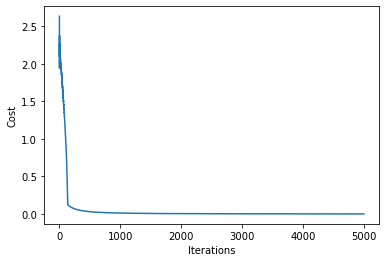

In [134]:
# Assigning the axes to the different elements.
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

In [135]:
forward(np.array(
   [0,0]
),predict=True)

array([[0.00153521]])

In [136]:
forward(np.array(
   [1,0]
),predict=True)

array([[0.99817763]])

In [137]:
forward(np.array(
   [0,1]
),predict=True)

array([[0.99807572]])

In [138]:
forward(np.array(
   [1,1]
),predict=True)

array([[0.00212543]])